In [2]:
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator
import pandas as pd
import numpy as np
from scipy import optimize
import os
import json
from matplotlib import pyplot as plt
import matplotlib

from collections import defaultdict

In [3]:
param_names = [
                 'num_trains',
                 'qf_lr',

               ]
param_full_names = [
                 'algorithm_args/num_trains_per_train_loop',
                 'qf_lr',

                    ]
result_names = [
                'expl_num_correct',
                'expl_successes',
                'expl_noop',

                'qf_loss',
                'Q_values_mean',
                'Q_values_std',

                ]
result_full_names = [
                     'exploration/env_infos/num_correct_Mean',
                     'exploration/env_infos/final/task_success_Mean',
                     'exploration/env_infos/noop_Mean',
                    'trainer/QF_Loss',
                    'trainer/Q_Predictions_Mean',
                    'trainer/Q_Predictions_Std',
                    ]

tests = ['pretrain/']


In [4]:
paths = sum([[(os.path.join(path,run),test) for run in os.listdir(path)] 
             for path,test in [(os.path.join(os.path.abspath(''),'logs',test,),test) for test in tests]],[]) 
paths = sorted(paths, key=lambda x: x[0])

class Reader:
    def read(self,paths,name='pretrain.csv'):
        dfs = []
        for path,test in paths:
            try:
                df = pd.read_csv(os.path.join(path,name))
                dfs.append(df)
            except:
                continue
        return dfs
    
dfs = Reader().read(paths)
for df in dfs:
    df.columns = df.columns.get_level_values(0)
    
def smooth(x):
    return np.convolve(x, np.ones(window), 'valid') / window

def plot(dfs, metrics):
    for metric in metrics:
        plt.figure(figsize=(12, 5))
        for indices, label in index_sets:
            data = [smooth(dfs[i][metric]) for i in indices if metric in dfs[i].keys()]
            min_len = min([len(x) for x in data])
            data = [x[:min_len] for x in data]
            if len(data) > 0:
                std_error = np.std(data, axis=0) / np.sqrt(len(indices)) 
                mean = np.mean(data, axis=0)
                plt.plot(mean, label=label)
                plt.fill_between(np.arange(len(mean)), mean-std_error, mean+std_error, alpha=0.1)
        plt.title('offline ' + metric)
        plt.xlabel('Epochs')
        plt.legend()




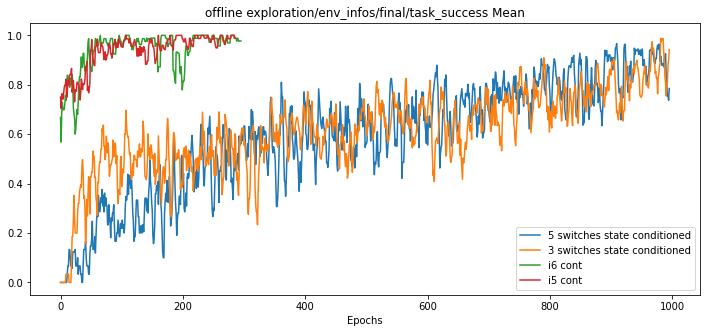

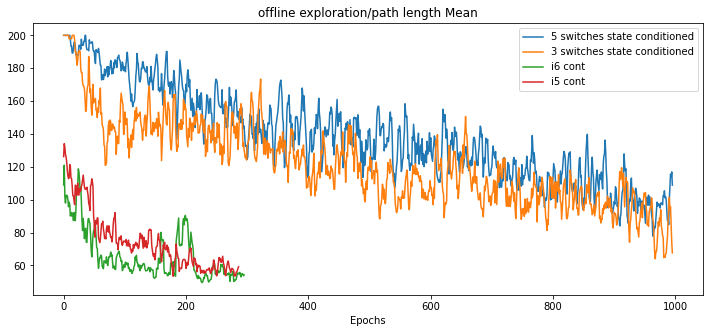

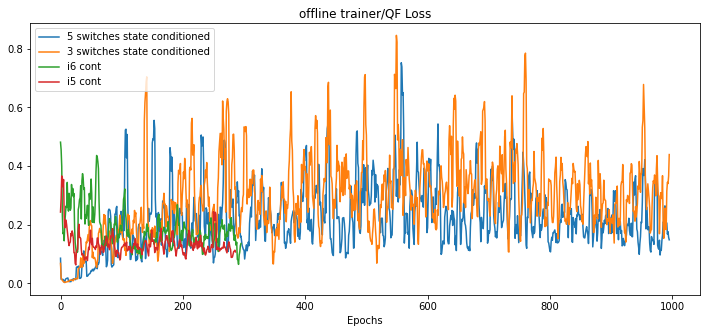

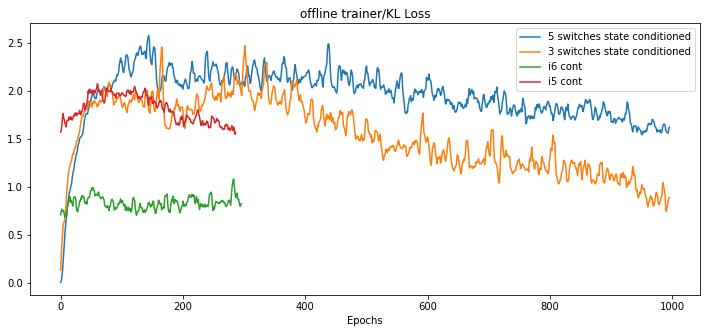

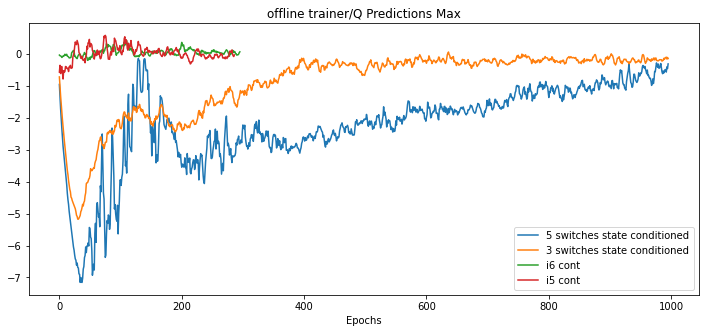

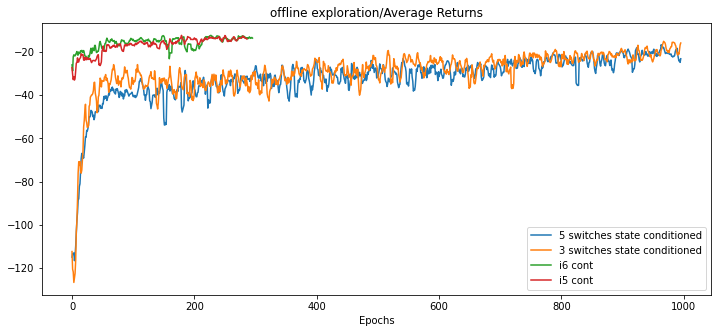

In [148]:
tests = ['pretrain']

paths = sum([[(os.path.join(path,run),test) for run in os.listdir(path)] 
             for path,test in [(os.path.join(os.path.abspath(''),'logs',test,),test) for test in tests]],[])

paths = sorted(paths, key=lambda x: x[0])

dfs = Reader().read(paths, name='progress.csv')
for df in dfs:
    df.columns = df.columns.get_level_values(0)
    
# old_pretrain
# i0 = [0], 'pretrain 5 switches beta 0.1'
# i1 = [1], 'pretrain 3 switches beta 0.1'
# i2 = [2], 'pretrain 5 switches beta 0.01'
# i3 = [3], 'pretrain 5 switches beta 0.01'
# i4 = [4], 'i3 continue 100'
# i5 = [5], 'i3 continue 200'
# i6 = [6], 'i5 continue 100 1e-4'
# i7 = [7], 'i5 continue 100 1e-4 more init 0.2 eps' # best
# i8 = [8], 'pretrain 3 switches max rew -0.5'
# i9 = [9], 'pretrain 5 switches max rew -0.2'
# i10 = [10], 'eval i5'
# i11 = [11], 'i5 continue 100 1e-4 more init less train max rew -0.1 500k buffer'
# i12 = [12], 'i5 continue 100 more init rew temp 5 adjust'
# i13 = [13], 'pretrain 5 switches more init rew temp 5 adjust'
# i14 = [14], 'pretrain 5 switches more init rew temp 2 max rew -0.1 adjust'
# i15 = [15], 'eval i8'
# i16 = [16], 'pretrain 3 switches more init rew temp 2 max rew -0.1 adjust'
# i17 = [17], 'i14 continue'
# i18 = [18], 'eval i16'
# i19 = [19], 'eval i7'
# i20 = [20], 'pretrain 5 switches more init rew temp 1 max rew -0.1 adjust'
# i21 = [21], 'pretrain 3 switches more init rew temp 1 max rew -0.1 adjust'
# i22 = [22], 'pretrain 5 switches more init rew temp 1 max rew -0.5 adjust clip'

i0 = [0], '5 switches temp 1 max -0.1'
i1 = [1], '5 switches temp 1 max -0.1 (cont.)'
i2 = [2], '5 switches temp 1 max -0.1 (cont.)'

# 1m buffer, 1/5 grad step per step
i3 = [3], '5 switches state conditioned'
i4 = [4], '3 switches state conditioned'

# 1m buffer, 1/10 grad step per step
i5 = [5], '5 switches state conditioned'
i6 = [6], '3 switches state conditioned'
i7 = [7], 'i6 cont'
i8 = [8], 'i5 cont'
i9 = [9], 'i5 cont'

metrics = ['exploration/env_infos/final/task_success Mean', 'exploration/path length Mean',
           'trainer/QF Loss', 'trainer/KL Loss', 'trainer/Q Predictions Max', 'exploration/Average Returns']


index_sets = [i5, i6, i7, i9]
window = 5
plot(dfs, metrics)

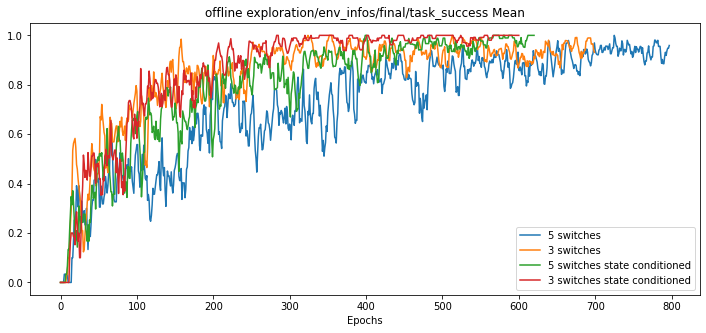

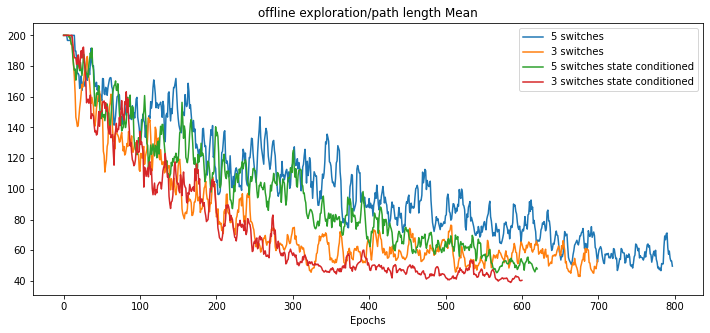

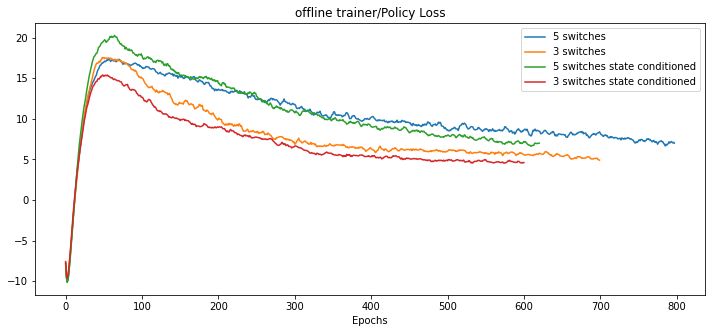

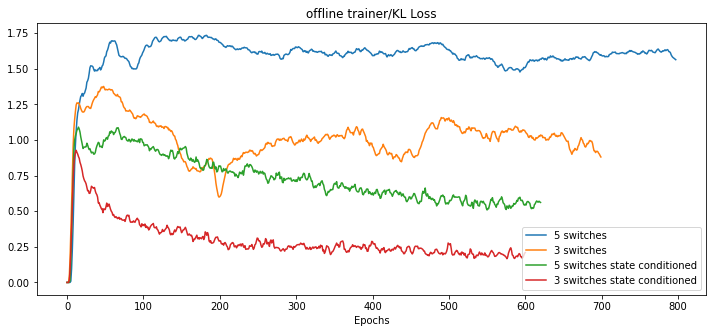

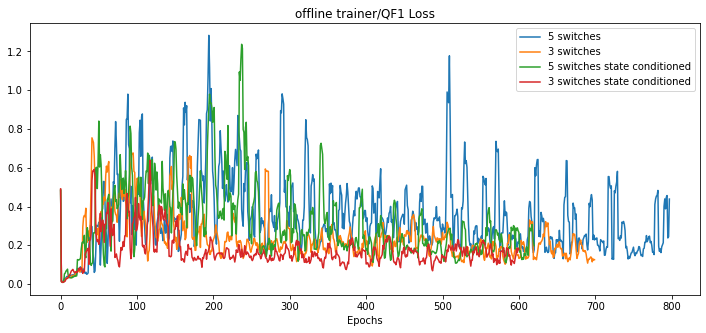

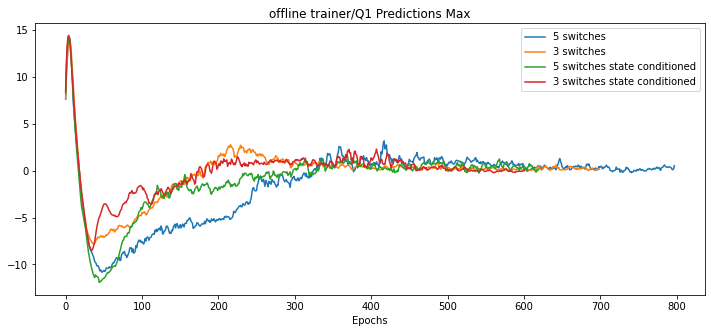

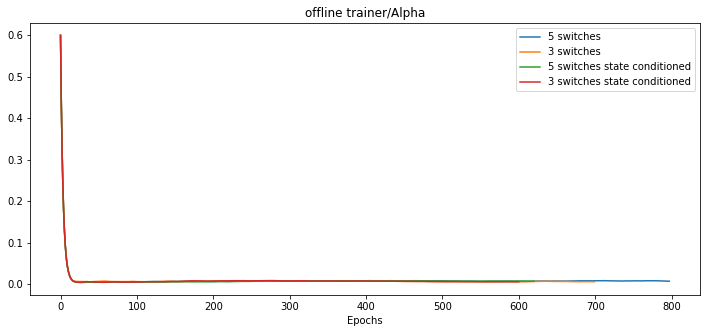

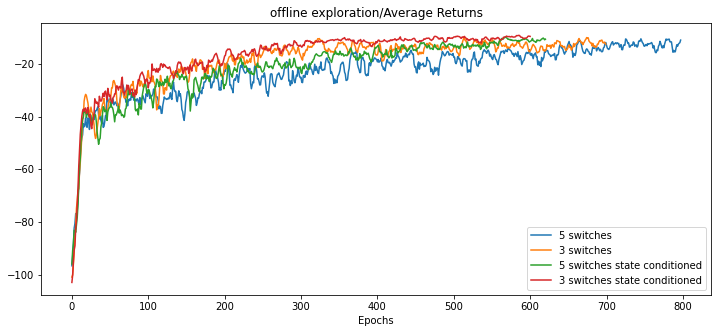

In [103]:
tests = ['pretrain-sac/']

paths = sum([[(os.path.join(path,run),test) for run in os.listdir(path)] 
             for path,test in [(os.path.join(os.path.abspath(''),'logs',test,),test) for test in tests]],[])

paths = sorted(paths, key=lambda x: x[0])


dfs = Reader().read(paths, name='progress.csv')
for df in dfs:
    df.columns = df.columns.get_level_values(0)
    
# old_sac (weird reward)
# reward offset -0.1
# i0 = [0], '5 switches, rew scale 10'
# i1 = [1], '5 switches, rew scale 1'
# i2 = [2], '3 switches, rew scale 1'

# reward offset -0.5, clip rewards to -1
# i3 = [3], '5 switches'
# i4 = [4], '3 switches'

# reward offset -0.1
i0 = [0], '5 switches'
i1 = [1], '3 switches'

i2 = [2], '5 switches state conditioned'
i3 = [3], '3 switches state conditioned'

metrics = ['exploration/env_infos/final/task_success Mean', 'exploration/path length Mean', 'trainer/Policy Loss', 'trainer/KL Loss',
           'trainer/QF1 Loss', 'trainer/Q1 Predictions Max', 'trainer/Alpha', 'exploration/Average Returns']

index_sets = [i0, i1, i2, i3]
window = 5
plot(dfs, metrics)


39


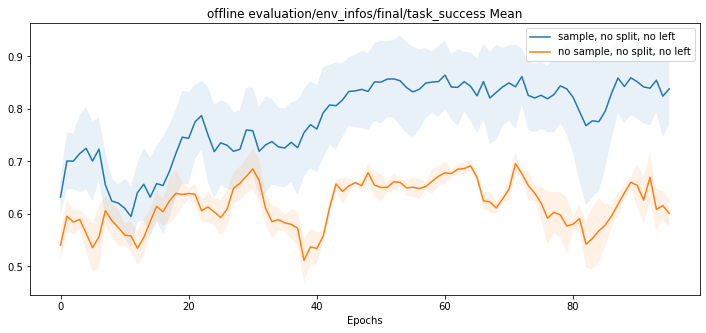

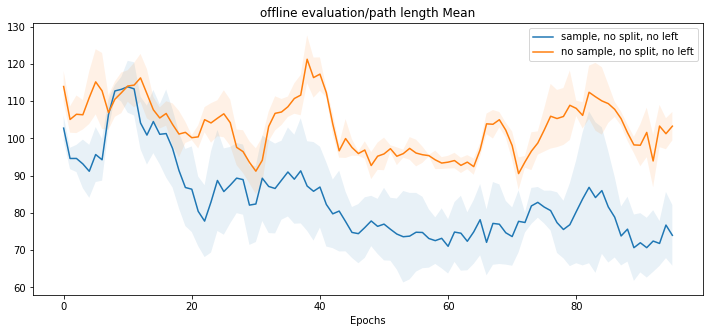

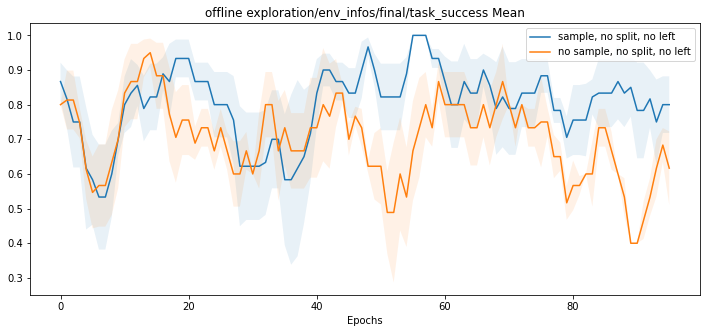

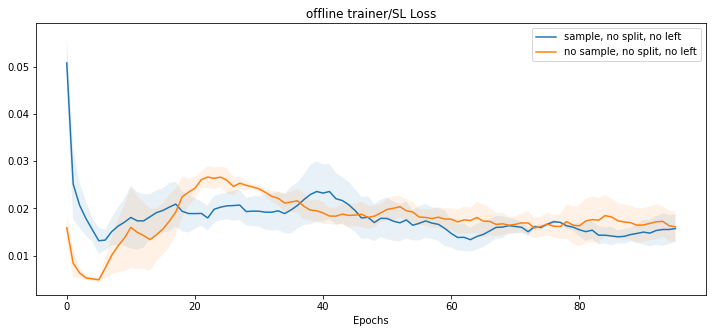

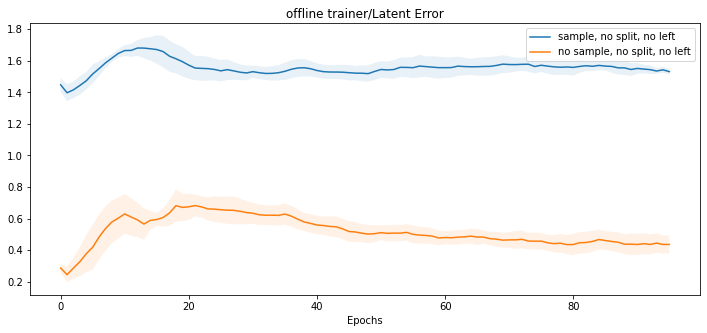

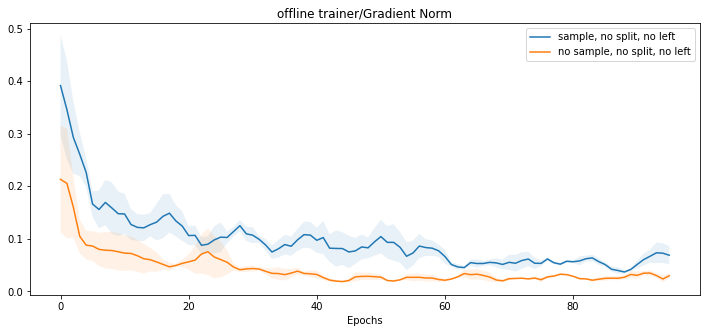

In [17]:
tests = ['calibrate-dqn-3']

paths = sum([[(os.path.join(path,run),test) for run in os.listdir(path)] 
             for path,test in [(os.path.join(os.path.abspath(''),'logs',test,),test) for test in tests]],[])

paths = sorted(paths, key=lambda x: x[0])

dfs = Reader().read(paths, name='progress.csv')
for df in dfs:
    df.columns = df.columns.get_level_values(0)
    
metrics = ['evaluation/env_infos/final/task_success Mean', 'evaluation/path length Mean',
           'exploration/env_infos/final/task_success Mean', 'trainer/SL Loss',
           'trainer/Latent Error', 'trainer/Gradient Norm']

print(len(dfs))

i0 = [0, 1, 2], 'sample, no split, all'
i1 = [3, 4, 5], 'sample, no split, no right'
i2 = [6, 7, 8], 'sample, no split, no left'
i3 = [9, 10, 11], 'sample, no split, no mid'

i4 = [12, 13, 14], 'sample, split, all'
i5 = [15, 16, 17], 'sample, split, no right'
i6 = [18, 19, 20], 'sample, split, no left'
i7 = [21, 22, 23], 'sample, split, no mid'

i8 = [24, 25, 26], 'no sample, no split, all'
i9 = [27, 28, 29], 'no sample, no split, no right'
i10 = [30, 31, 32], 'no sample, no split, no left'
i11 = [33, 34, 35], 'no sample, no split, no mid'

i12 = [36, 37, 38], 'no sample, split, all'
i13 = [39, 40, 41], 'no sample, split, no right'
i14 = [42, 43, 44], 'no sample, split, no left'
i15 = [45, 46, 47], 'no sample, split, no mid'



index_sets = [i2, i10] #[i24, i25, i26, i27, i28, i29]
window = 5
plot(dfs, metrics)

4


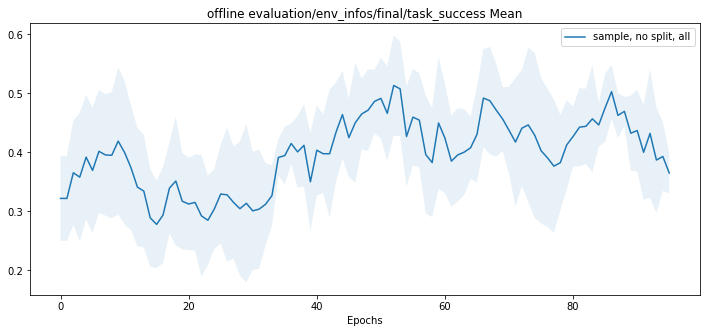

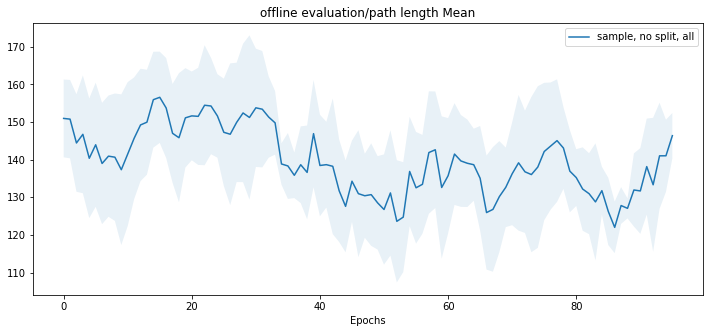

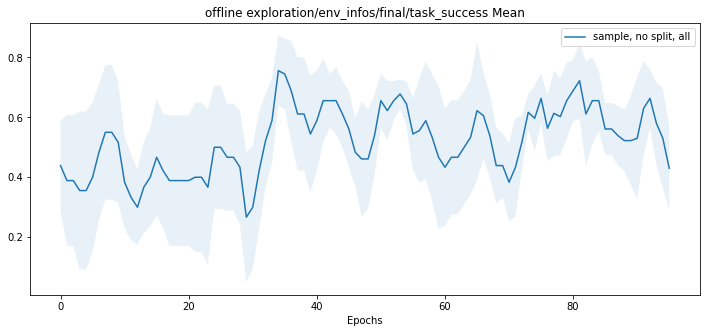

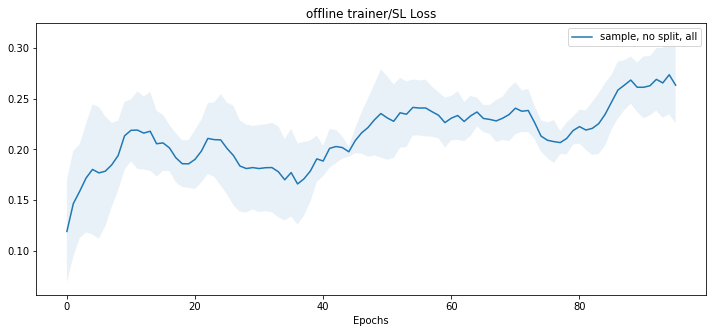

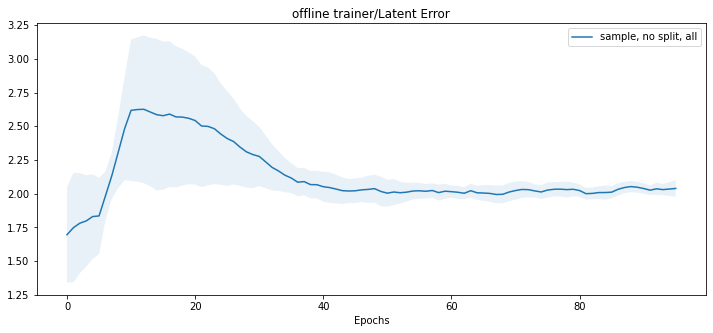

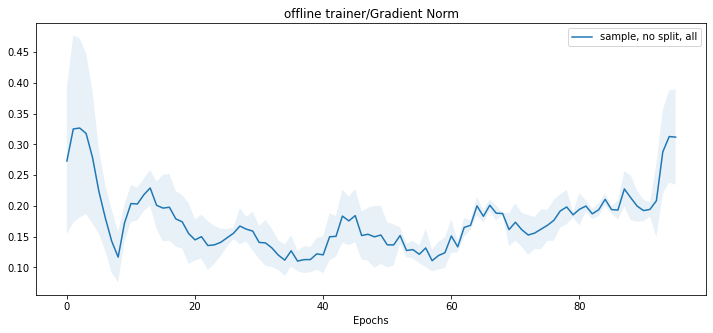

In [11]:
tests = ['calibrate-sac-3']

paths = sum([[(os.path.join(path,run),test) for run in os.listdir(path)] 
             for path,test in [(os.path.join(os.path.abspath(''),'logs',test,),test) for test in tests]],[])

paths = sorted(paths, key=lambda x: x[0])

dfs = Reader().read(paths, name='progress.csv')
for df in dfs:
    df.columns = df.columns.get_level_values(0)
    
metrics = ['evaluation/env_infos/final/task_success Mean', 'evaluation/path length Mean',
           'exploration/env_infos/final/task_success Mean', 'trainer/SL Loss',
           'trainer/Latent Error', 'trainer/Gradient Norm']


i0 = [0, 1, 2], 'sample, no split, all'
i1 = [3, 4, 5], 'sample, no split, no right'
i2 = [6, 7, 8], 'sample, no split, no left'
i3 = [9, 10, 11], 'sample, no split, no mid'

i4 = [12, 13, 14], 'sample, split, all'
i5 = [15, 16, 17], 'sample, split, no right'
i6 = [18, 19, 20], 'sample, split, no left'
i7 = [21, 22, 23], 'sample, split, no mid'

i8 = [24, 25, 26], 'no sample, no split, all'
i9 = [27, 28, 29], 'no sample, no split, no right'
i10 = [30, 31, 32], 'no sample, no split, no left'
i11 = [33, 34, 35], 'no sample, no split, no mid'

i12 = [36, 37, 38], 'no sample, split, all'
i13 = [39, 40, 41], 'no sample, split, no right'
i14 = [42, 43, 44], 'no sample, split, no left'
i15 = [45, 46, 47], 'no sample, split, no mid'

print(len(dfs))


index_sets = [i0] #[i24, i25, i26, i27, i28, i29]
window = 5
plot(dfs, metrics)

In [131]:
tests = ['gaze-sanity/']

paths = sum([[(os.path.join(path,run),test) for run in os.listdir(path)] 
             for path,test in [(os.path.join(os.path.abspath(''),'logs',test,),test) for test in tests]],[]) 
paths = sorted(paths, key=lambda x: x[0])

dfs = Reader().read(paths, name='progress.csv')
for df in dfs:
    df.columns = df.columns.get_level_values(0)
    

# i0 = [0], '1 switch sanity'
# i1 = [1], 'sanity'
# i2 = [2], 'qr sanity'

# i0 = [0], 'shaped 10'
# i1 = [1], 'bc'
# i2 = [2], 'shaped qr 10'
# i3 = [3], 'sparse 10'
# i4 = [4], 'sparse 10 squash'

# beta = 1
i0 = [0], 'VAE init'
i1 = [1], 'Random init'
i2 = [2], 'Direct gaze'
i3 = [3], 'VAE init w/ sampling training (and target)'
i4 = [4], 'i0 train w/ diff eps'
i5 = [5], 'VAE init w/ reward loss'

# beta = 0.1
i6 = [6], '(1) Goal Pos Input, L2 Rew'
i7 = [7], '(2) Goal Pos Input, L2 Rew (cont.)'
i8 = [8], '(3) Gaze, Sparse -1 Rew, Init w/ (2) and VAE'

i9 = [9], 'i6 w/ sampling training (beta=0.1)'
i10 = [10], 'i6 w/ sampling training (beta=1)'
i11 = [11], '(4) Goal Pos Input, L2 Rew, w/ sampling training'
i12 = [12], 'i7 gaze transfer'
i13 = [13], 'Eval on Training Gaze'#'(5) Gaze, Sparse -1 Rew, Init w/ (4) and VAE'

# actual eval gaze
i14 = [14], 'Eval on Validation Gaze'
i15 = [15], 'i13 20'
i16 = [16], 'i15 latent train'
i17 = [17], 'i13 50'
i18 = [18], 'i17 latent train'

index_sets = [i14, i15, i16, i17, i18]
window = 10
plot(dfs)
    

FileNotFoundError: [Errno 2] No such file or directory: '/home/jensen/Documents/rail/CursorControl/image/logs/gaze-sanity/'

In [ ]:
import h5py
import torch

data = h5py.File('rl/gaze_capture/gaze_data.h5', 'r')
state = torch.load('rl/gaze_capture/checkpoint.pth.tar')['state_dict']
weights = state['fc.2.weight'].cpu().detach().numpy().T
bias = state['fc.2.bias'].cpu().detach().numpy().T
features = []
for key in data.keys():
    features.append(data[key][()][0])
    # pos = data[key][()] @ weights + bias
    # plt.scatter(pos[:, 0], pos[:, 1], label=key)
#plt.legend()
for i, f1 in enumerate(features):
    for f2 in features[i + 1:]:
        print(np.linalg.norm(f1 - f2))

In [ ]:
from rlkit.util.io import load_local_or_remote_file
from mpl_toolkits.mplot3d import Axes3D

rl_gaze = h5py.File('rl/gaze_capture/gaze_data_rl.h5', 'r')

gaze_demo_path = 'demos/int_OneSwitch_sim_gaze_on_policy_100_all_debug_1615418204600284881.npy'
gaze_demos = load_local_or_remote_file(gaze_demo_path)
gaze = [[], [], []]
for path in gaze_demos:
    target = np.where(path['env_infos'][1]['target_string'] == 0)[0][0]
    gaze[target].append(path['observations'][1][-128:])
    
pos_path = 'demos/int_OneSwitch_sim_goal_model_on_policy_1000_all_debug_1615835470059229510.npy'
pos_demos = load_local_or_remote_file(pos_path)
pos = [[], [], []]
for path in pos_demos[:100]:
    target = np.where(path['env_infos'][1]['target_string'] == 0)[0][0]
    pos[target].append(path['observations'][1][-128:-125])
pos = [np.array(x) for x in pos]
    
discrim_policy_path = 'logs/bc-mixed/bc_mixed_2021_03_15_12_27_01_0000--s-0/pretrain.pkl'
#discrim_policy_path = 'logs/bc-mixed/bc_mixed_2021_03_15_14_39_16_0000--s-0/pretrain.pkl'
discrim_policy_path = 'logs/bc-mixed/bc_mixed_2021_03_15_14_54_25_0000--s-0/pretrain.pkl'
discrim_policy_path = 'logs/bc-mixed/bc_mixed_2021_03_16_21_52_57_0000--s-0/pretrain.pkl'
discrim_policy_path = 'logs/sparse-mixed/sparse_mixed_2021_03_15_21_16_50_0000--s-0/pretrain.pkl'
#discrim_policy_path = 'logs/sparse-mixed/sparse_mixed_2021_03_17_14_09_47_0000--s-0/pretrain.pkl'


policy = torch.load(discrim_policy_path, map_location=torch.device("cpu"))


fig = plt.figure()
#ax = Axes3D(fig)

# for key in rl_gaze.keys():
for i in range(3):
    rl = rl_gaze[str(i)][()]
    rl_pred = 0
    gaze_pred = 0

#     encoders = policy['qf'].gaze_encoders
#     for encoder in encoders:
#         rl_pred += encoder(torch.Tensor(rl)).detach().numpy()
#         gaze_pred += encoder(torch.Tensor(gaze[i])).detach().numpy()
        
    encoder = policy['qf'].gaze_encoder
    
    
#     for encoder in policy.gaze_encoders:
#         rl_pred += encoder(torch.Tensor(rl)).detach().numpy()
#         gaze_pred += encoder(torch.Tensor(gaze[i])).detach().numpy()
        
#    rl_pred /= policy['qf'].num_encoders
#    gaze_pred /= policy['qf'].num_encoders
    rl_pred = encoder(torch.Tensor(rl)).detach().numpy()
    gaze_pred = encoder(torch.Tensor(gaze[i])).detach().numpy()
    #ax.scatter(rl_pred[..., 0], rl_pred[..., 1], rl_pred[..., 2])
    #ax.scatter(gaze_pred[..., 0], gaze_pred[..., 1], gaze_pred[..., 2])
    #ax.scatter(pos[i][:, 0], pos[i][:, 1], pos[i][:, 2])
    #plt.scatter(rl_pred[..., 0], rl_pred[..., 1])
    plt.scatter(gaze_pred[..., 0], gaze_pred[..., 1])
    plt.scatter(pos[i][:, 0], pos[i][:, 1])



In [ ]:
alphas = dict(zip(result_names,[.01]*len(result_names)))
font = {'family' : 'normal',
        'weight': 'normal',
        'size'   : 12}
matplotlib.rc('font', **font)
fig, axs = plt.subplots(nrows=(len(result_names)+1)//2,ncols=2,figsize=(15,5))
axs = axs.flatten()
idx = pd.IndexSlice
test_name_map = {'experiment2-laptop-dqn':'dqn','experiment2-laptop-sac':'sac',
                 'experiment2-laptop-dqn-cql':'cql-dqn','experiment2-laptop-cql':'cql-sac',}
metric_name_map = {'expl_successes':'Success Rate','expl_noop': 'User Noop Rate'}

# slice_df = slice_df.drop(columns=[(5e-4,1e-2),(1e-3,1e-2)])
# print(slice_df.head())


for (name,alpha),ax in zip(alphas.items(),axs):
#     try:
        mean_graph = df_mean.loc[:,idx[:,:,:,:,name]]
        std_graph = df_std.loc[:,idx[:,:,name]]
#         graph_df = df.loc[:,[(.001,.1,.1,name),(.001,1,.3,name)]]

#         graph_df = graph_df.drop(columns=[(1e-3,5e-5,1e-2)])
        mean_graph.columns = mean_graph.columns.droplevel([c for c in mean_graph.columns.names
                                                           if mean_graph.columns.get_level_values(c).unique().size == 1])
        mean_graph = mean_graph.ewm(alpha=alpha).mean()
        std_graph.columns = std_graph.columns.droplevel([c for c in std_graph.columns.names
                                                         if std_graph.columns.get_level_values(c).unique().size == 1])
        std_graph = std_graph.ewm(alpha=alpha).mean()
        for (col_names,mean),(_col_names,std) in zip(mean_graph.iteritems(),std_graph.iteritems()):
            ax.fill_between(x=range(mean.size),y1=np.maximum(0,mean-std),y2=np.minimum(1,mean+std),alpha=.3)
            ax.plot(range(mean.size),mean,label=f"({not col_names[0]},{test_name_map[col_names[1]]})")
        ax.set_title(metric_name_map[name])
        ax.set_xlabel("Epochs")
#         ax.legend(loc=3,fontsize='xx-small',title_fontsize='xx-small',title="user input penalty,algorithm")
        ax.legend(loc=3,fontsize='xx-small',title_fontsize='xx-small',title="user input penalty,algorithm")
#     except:
#         continue

# plt.savefig('experiment2_laptop_full.png')

In [47]:
defaults = { demo[-17:-4]:np.load(os.path.join(os.path.abspath(''),'demos',demo),allow_pickle=True)
             for demo in os.listdir(os.path.join(os.path.abspath(''),"demos")) if f"thr_" in demo and "OneSwitch" in demo}
# defaults = [np.load(os.path.join(os.path.abspath(''),'demos',f"LightSwitch_usermodel_1001.npy"),allow_pickle=True)]

In [48]:
defaults.keys()

dict_keys(['thr_.5_eps_50', 'thr_.5_eps_25', '_thr_.5_eps_0', '_thr_.0_eps_0', '_thr_.2_eps_0'])

In [49]:
success = {key:np.mean([path['env_infos'][-1]['task_success'] for path in paths])
           for key,paths in defaults.items()}
bad_contact = {key:np.mean([path['env_infos'][-1]['bad_contact'] for path in paths])
           for key,paths in defaults.items()}
noop = {key:np.mean(sum([[info['noop'] for info in path['env_infos']] for path in paths],[]))
           for key,paths in defaults.items()}
cos = {key:np.mean(sum([[info['cos_error'] for info in path['env_infos']] for path in paths],[]))
           for key,paths in defaults.items()}

In [50]:
success

{'thr_.5_eps_50': 1.0,
 'thr_.5_eps_25': 1.0,
 '_thr_.5_eps_0': 1.0,
 '_thr_.0_eps_0': 1.0,
 '_thr_.2_eps_0': 0.99375}

In [51]:
noop

{'thr_.5_eps_50': 0.5710240436595788,
 'thr_.5_eps_25': 0.6327110825018775,
 '_thr_.5_eps_0': 0.6814617849594328,
 '_thr_.0_eps_0': 0.7638537347191556,
 '_thr_.2_eps_0': 0.7429401323220913}

In [22]:
params_2_test = defaultdict(list)

for path in paths:
    test_name = os.path.split(os.path.split(path)[0])[1]     

    params = []
    with open(os.path.join(path,'variant.json'),) as f:
        all_params = json.load(f) 
    for name,full_name in zip(param_names,param_full_names):
        param = all_params
        for key in full_name.split('/'):
            param = param.get(key,0)
        params.append(param)
    params = tuple(params)
    params_2_test[params].append(test_name)
    

TypeError: expected str, bytes or os.PathLike object, not tuple

In [32]:
params_2_test

defaultdict(list,
            {(1000,): ['run1', 'run0', 'run4'],
             (1,): ['run5', 'run2', 'run3']})

In [67]:
trajs = [np.load(os.path.join(os.path.abspath(''),'eval_paths1',f"{run[3:]}_eval_paths.npy"),allow_pickle=True)
             for run in ['run14']]

In [68]:
print(len(trajs[0]))

18


In [85]:
pos = sum([[tr['observations'][:,-20:-17] for tr in traj[:40]] for traj in trajs],[])
pos1 = pos[0]
mean_pos = np.mean(pos1,axis=0)
max_extent = np.max(np.linalg.norm(pos1-mean_pos,axis=1))
pos1 = (pos1-mean_pos)/max_extent

pos2 = pos[1]
mean_pos = np.mean(pos2,axis=0)
max_extent = np.max(np.linalg.norm(pos2-mean_pos,axis=1))
pos2 = (pos2-mean_pos)/max_extent

# pos = np.mean(pos,axis=0)
reg_pos = []
for traj in pos:
    mean_pos = np.mean(traj,axis=0)
    max_extent = np.max(np.linalg.norm(traj-mean_pos,axis=1))
    traj = (traj-mean_pos)/max_extent
    reg_pos.append(traj)
pos = np.array([np.mean([sample[i] for sample in reg_pos if len(sample) > i],axis=0) for i in range(200)])


NameError: name 'trajs' is not defined

In [70]:
# a = .15
# b = .3
# c = .6

In [71]:
dpos = [tr['observations'][:,-20:-17] for tr in defaults[0]]
dpos1 = dpos[0]
mean_pos = np.mean(dpos1,axis=0)
max_extent = np.max(np.linalg.norm(dpos1-mean_pos,axis=1))
dpos1 = (dpos1-mean_pos)/max_extent

dreg_pos = []
for traj in dpos:
    mean_pos = np.mean(traj,axis=0)
    max_extent = np.max(np.linalg.norm(traj-mean_pos,axis=1))
    traj = (traj-mean_pos)/max_extent
    dreg_pos.append(traj)
dpos = np.array([np.mean([sample[i] for sample in dreg_pos if len(sample) > i],axis=0) for i in range(200)])


In [72]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

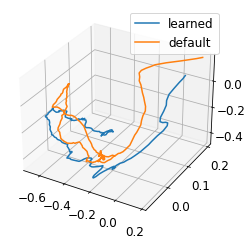

In [73]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(*list(zip(*pos)),label='learned')
ax.plot(*list(zip(*dpos)),label='default')
ax.legend()

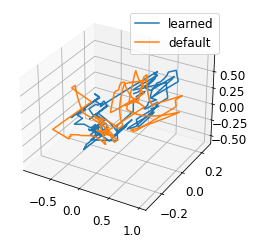

In [74]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(*list(zip(*pos1)),label='learned')
ax.plot(*list(zip(*dpos1)),label='default')
ax.legend()

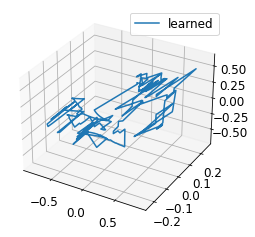

In [75]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(*list(zip(*pos2)),label='learned')
# ax.plot(*list(zip(*dpos2)),label='default')
ax.legend()